In [131]:
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np
from helpers import *
import ants

print(f'AntsPy version = {ants.__version__}')
print(f'SimpleITK version = {sitk.__version__}')

AntsPy version = 0.4.2
SimpleITK version = 2.3.1


In [141]:
# Path to your .mha file
file_path = "D:/NU/Spine_Segmentation_Project/My/FinalSoluationWithMonai/Dataset/Raw/images/7_t2.mha"
Mask_path = "D:/NU/Spine_Segmentation_Project/My/FinalSoluationWithMonai/Dataset/Raw/masks/7_t2.mha"

image = sitk.ReadImage(file_path,imageIO="MetaImageIO")
mask = sitk.ReadImage(Mask_path,imageIO="MetaImageIO")
image= sitk.DICOMOrient(image,'RPS')
mask= sitk.DICOMOrient(mask,'RPS')

- Internal axis are (X,Y,Z). It means, when we get numpy array dimensions are (Z,Y,X) i.e. shifted.
- When we define orientation, orientation string is according to internal axis. 
- The orientation string is set with the latest letter, e.g. : 
    - "RPS" = (left-to-Right, anterior-to-Posterior, inferior-to-Superior)
    - "PSR" = (anterior-to-Posterior, inferior-to-Superior, left-to-Right)

- Internal Pixel arrangement for SimpleItk
- (X, Y, Z) = (→, ↓, ↑)

In [142]:

image_array = sitk.GetArrayFromImage(image)
mask_array = sitk.GetArrayFromImage(mask)

In [143]:
print('----------------Image----------------')
print('Size : ',image.GetSize())
print('Dimension : ',image.GetDimension())
print('Depth : ',image.GetDepth())
print('Height : ',image.GetHeight())
print('Width : ',image.GetWidth())
print('Direction : ',image.GetDirection())
print('Spacing : ',image.GetSpacing())
print('Origin : ',image.GetOrigin())
print('PixelID : ',image.GetPixelID())
print('----------------Mask----------------')
print('Size : ',mask.GetSize())
print('Dimension : ',mask.GetDimension())
print('Depth : ',mask.GetDepth())
print('Height : ',mask.GetHeight())
print('Width : ',mask.GetWidth())
print('Direction : ',mask.GetDirection())
print('Spacing : ',mask.GetSpacing())
print('Origin : ',mask.GetOrigin())
print('PixelID : ',mask.GetPixelID())

----------------Image----------------
Size :  (32, 128, 128)
Dimension :  3
Depth :  128
Height :  128
Width :  32
Direction :  (-1.0, 0.0, 0.0, 0.0, 1.0, -4.897e-12, 0.0, 4.897e-12, 1.0)
Spacing :  (1.753124974668041, 2.34375, 2.34375)
Origin :  (12.2353515625, -153.26876521037377, -97.15740391686)
PixelID :  3
----------------Mask----------------
Size :  (32, 128, 128)
Dimension :  3
Depth :  128
Height :  128
Width :  32
Direction :  (-1.0, 0.0, 0.0, 0.0, 1.0, -4.897e-12, 0.0, 4.897e-12, 1.0)
Spacing :  (1.753124974668041, 2.34375, 2.34375)
Origin :  (12.2353515625, -153.26876521037377, -97.15740391686)
PixelID :  2


In [144]:
np.min(image_array), np.max(image_array), type(image_array), image_array.shape

(0, 640, numpy.ndarray, (128, 128, 32))

In [145]:
np.min(mask_array), np.max(mask_array), type(mask_array), mask_array.shape

(0, 17, numpy.ndarray, (128, 128, 32))

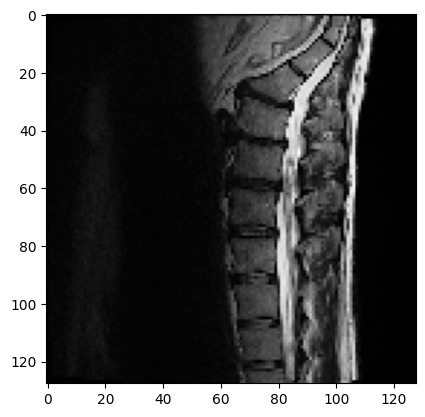

In [146]:
image_n_slice = int(image.GetWidth() / 2)


plt.imshow(image_array[:, :,image_n_slice], cmap=plt.cm.Greys_r)
plt.show()

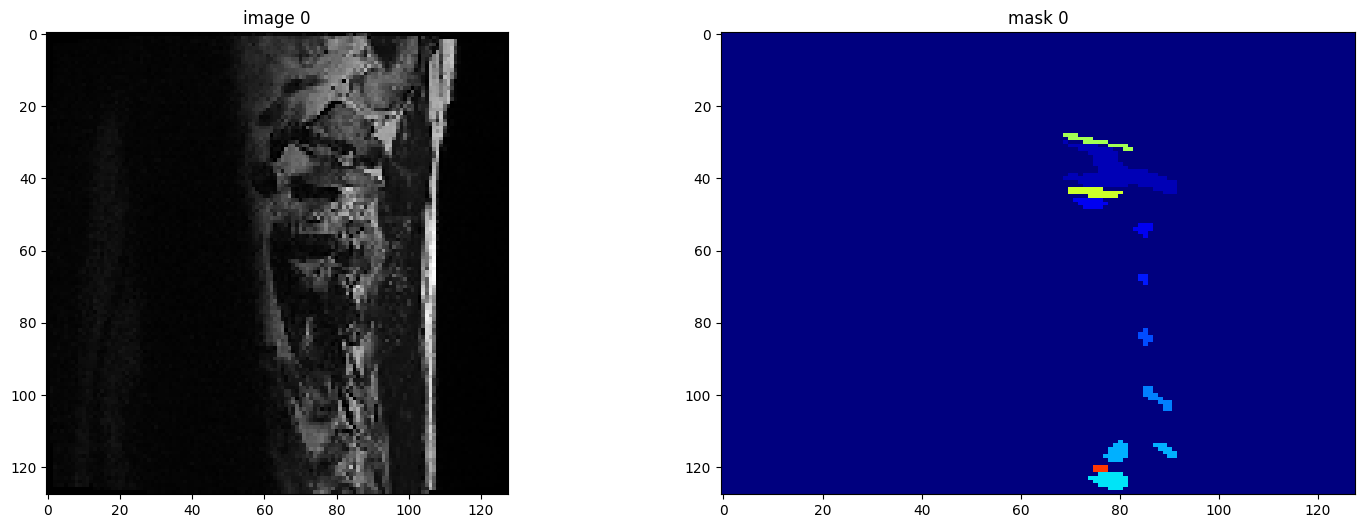

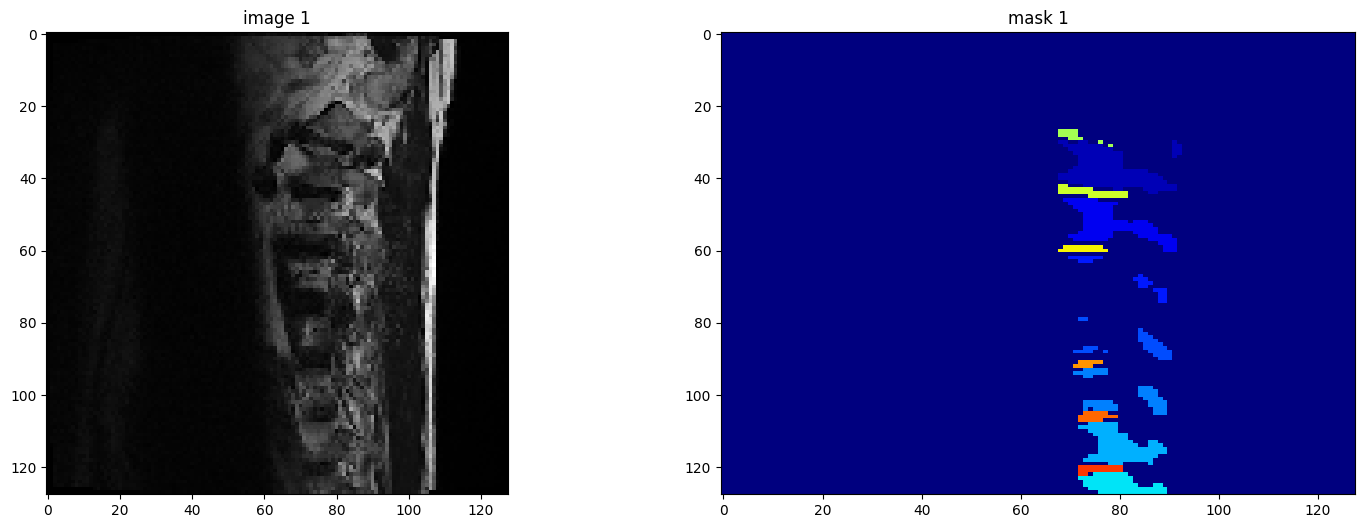

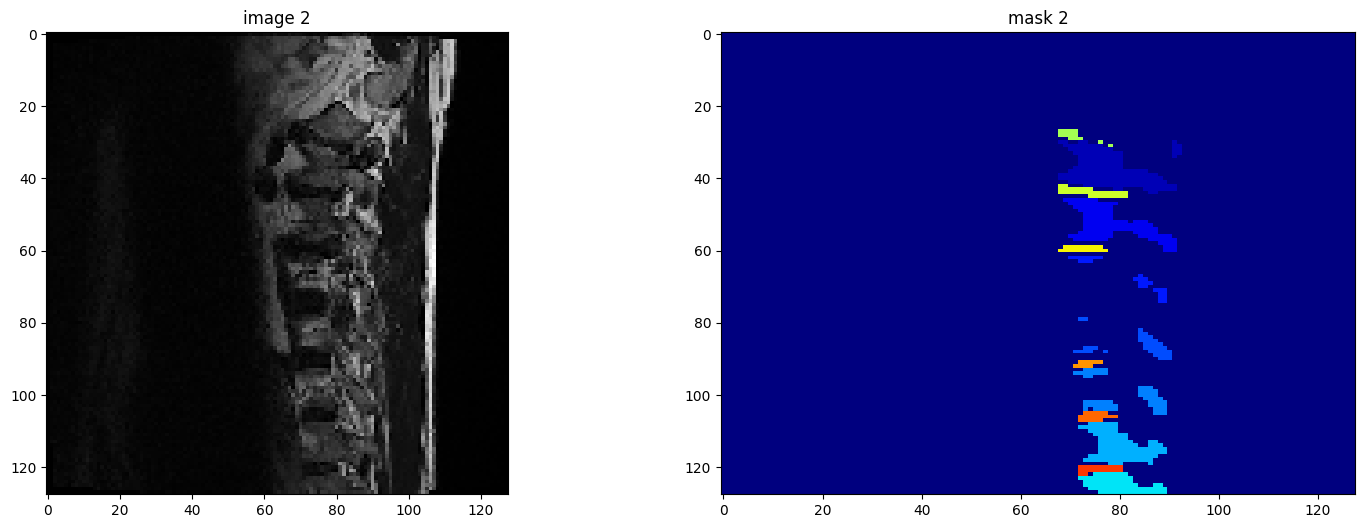

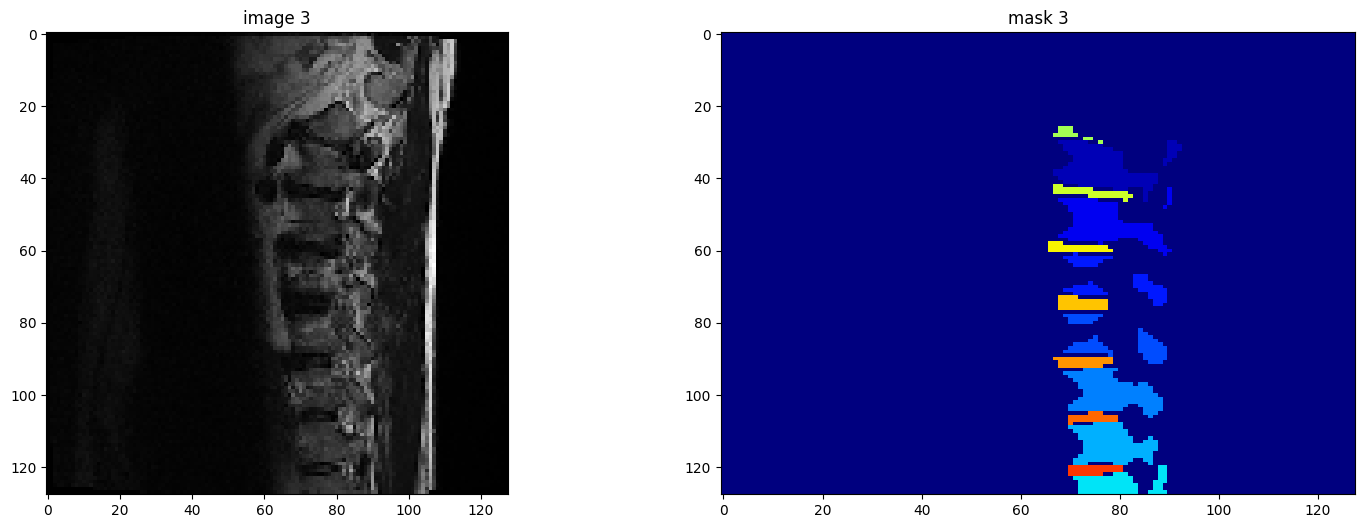

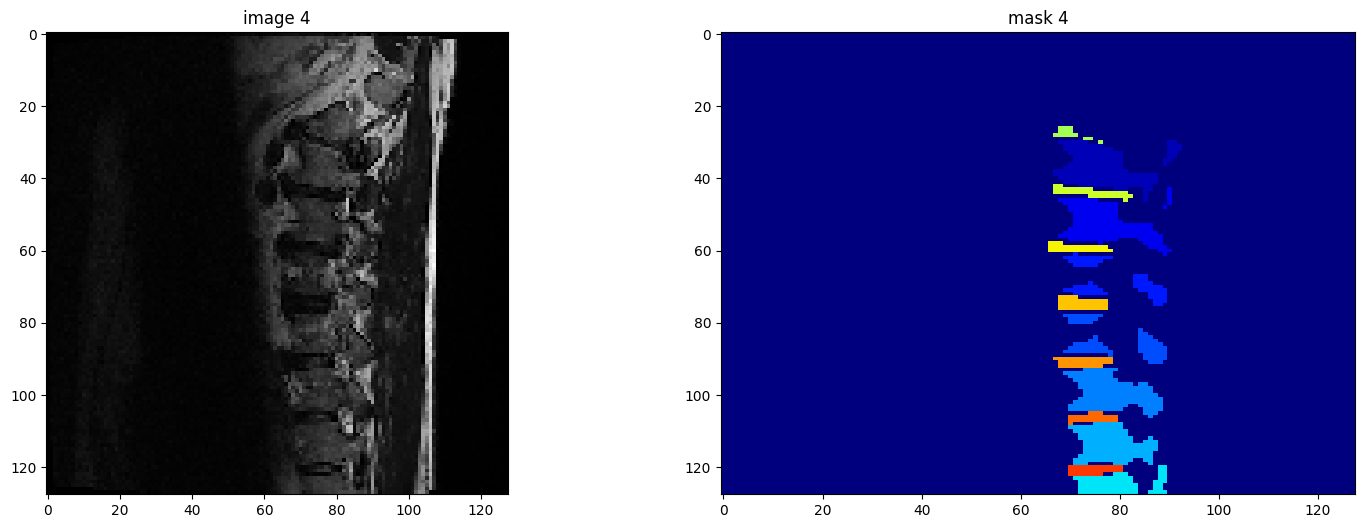

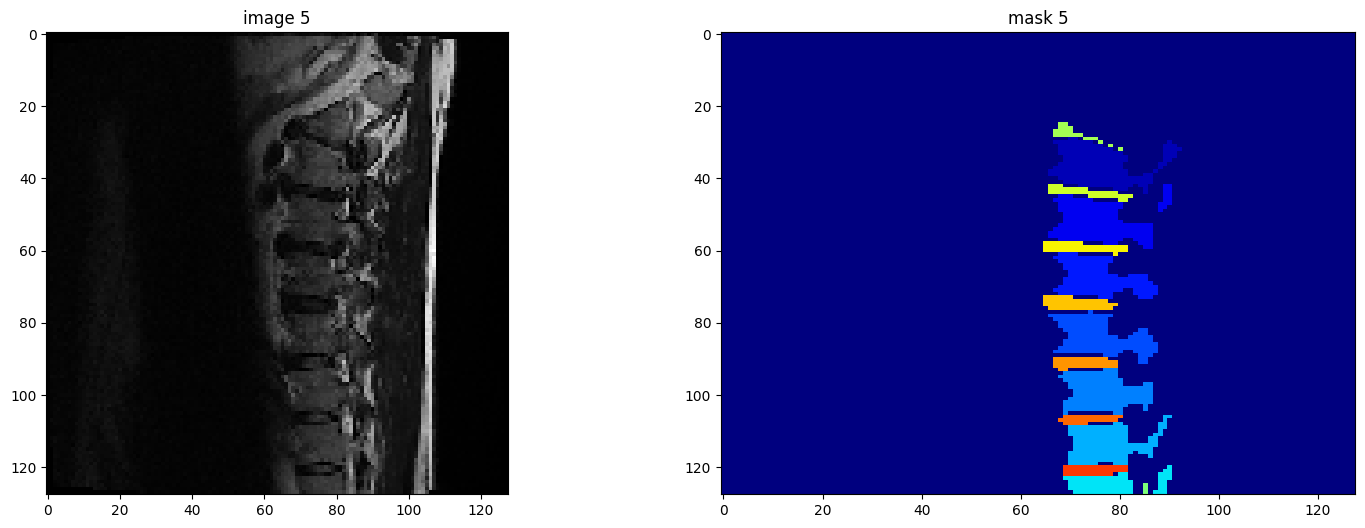

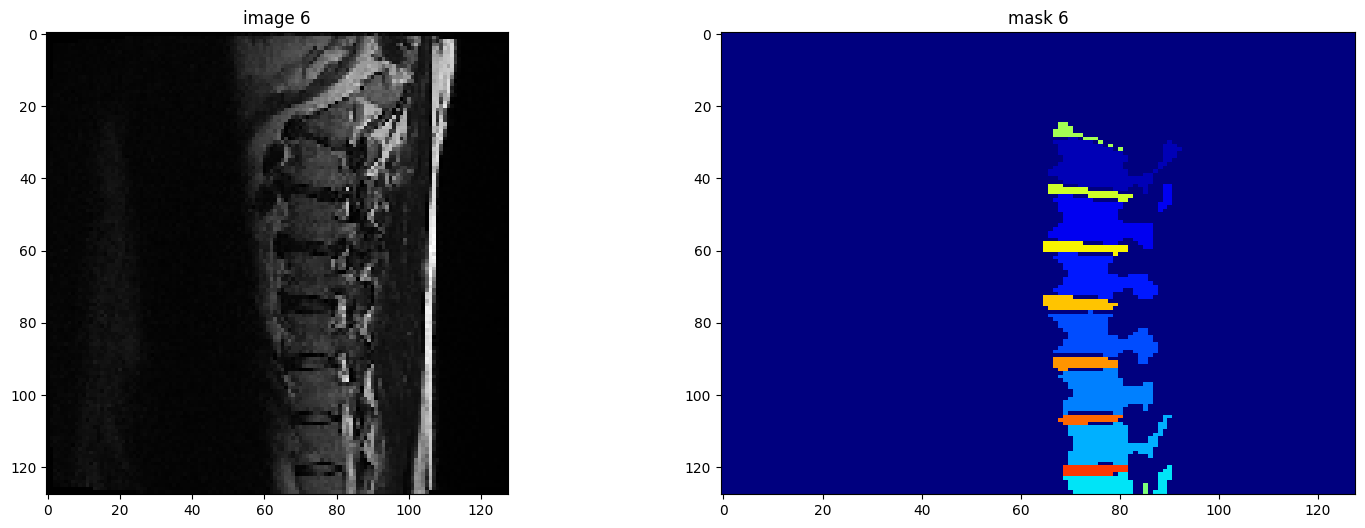

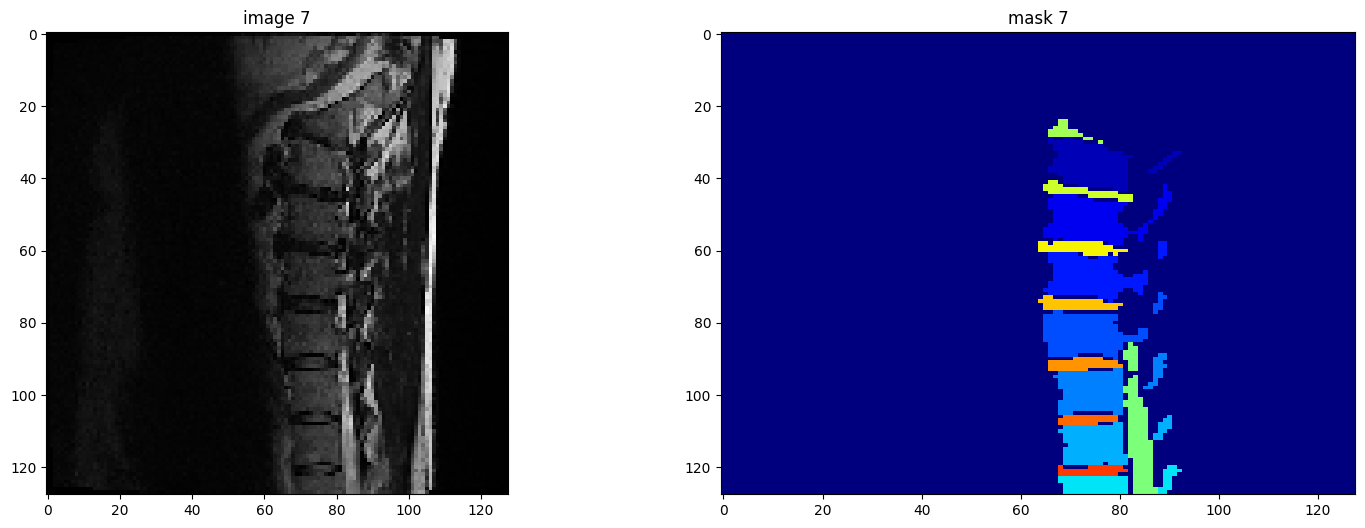

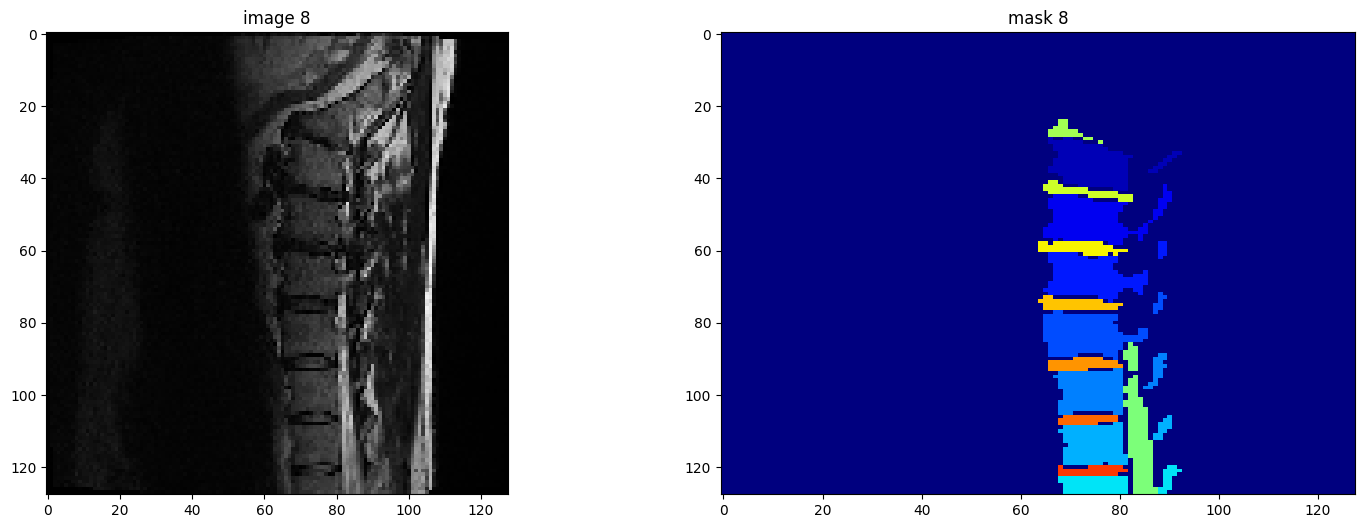

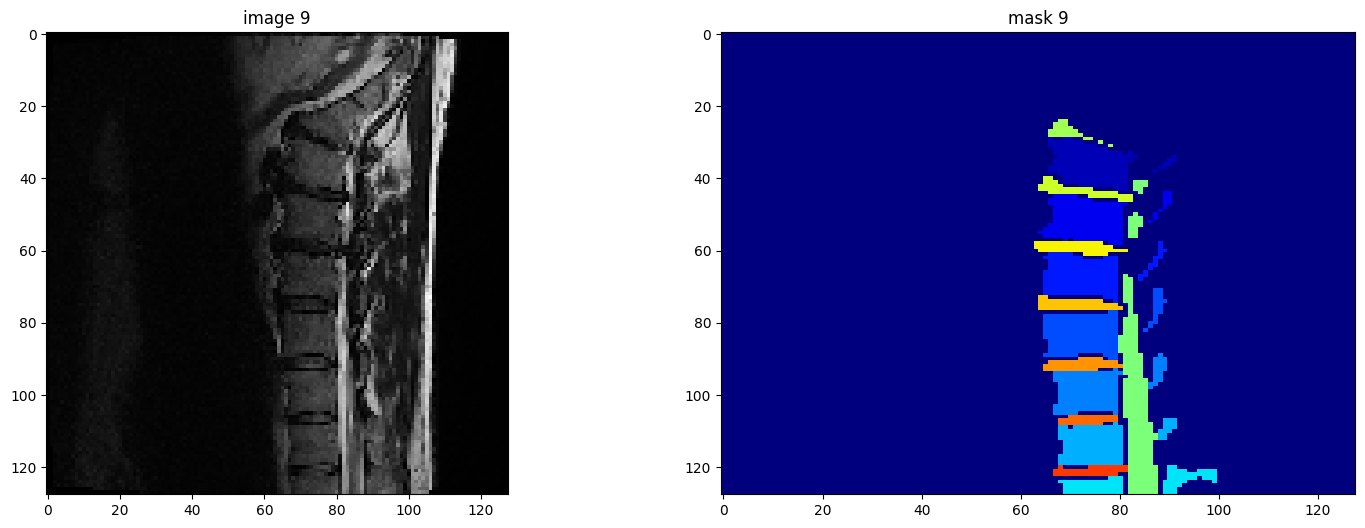

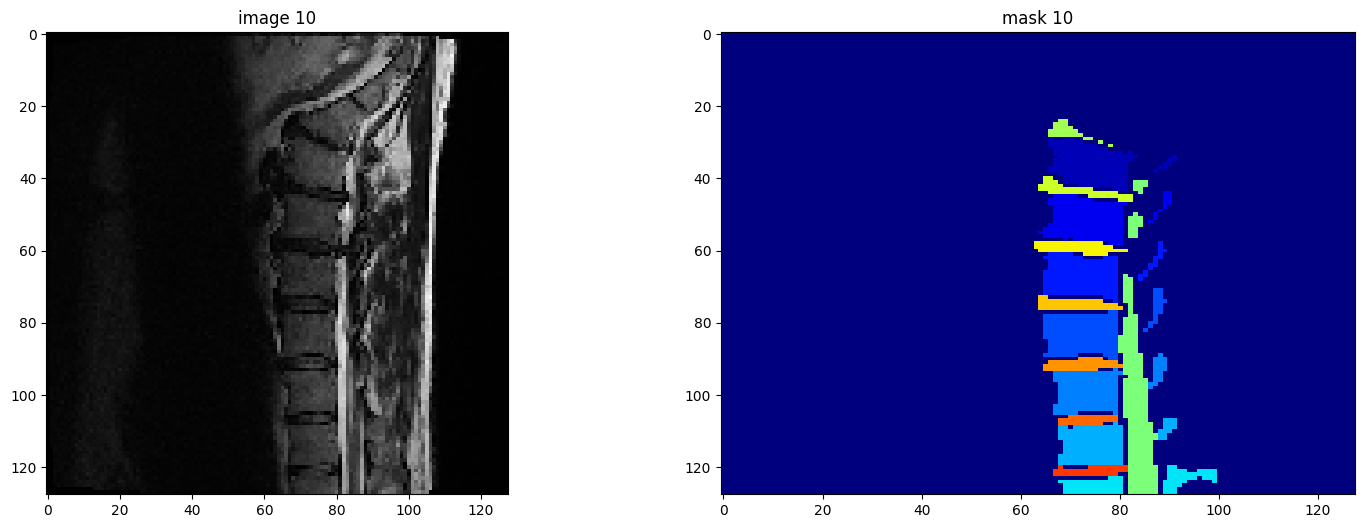

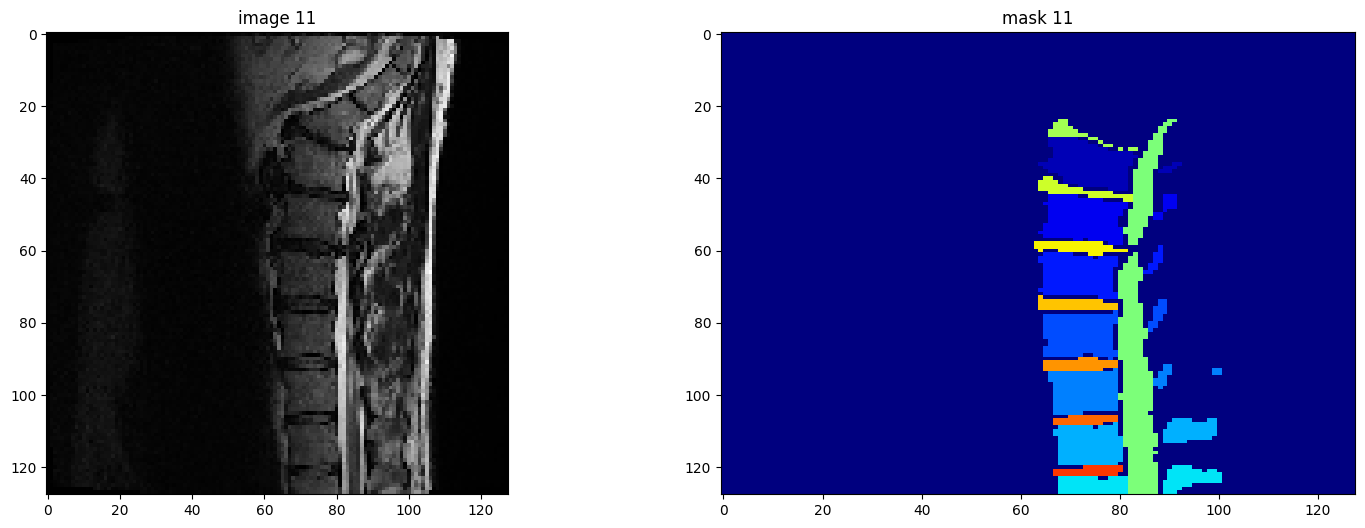

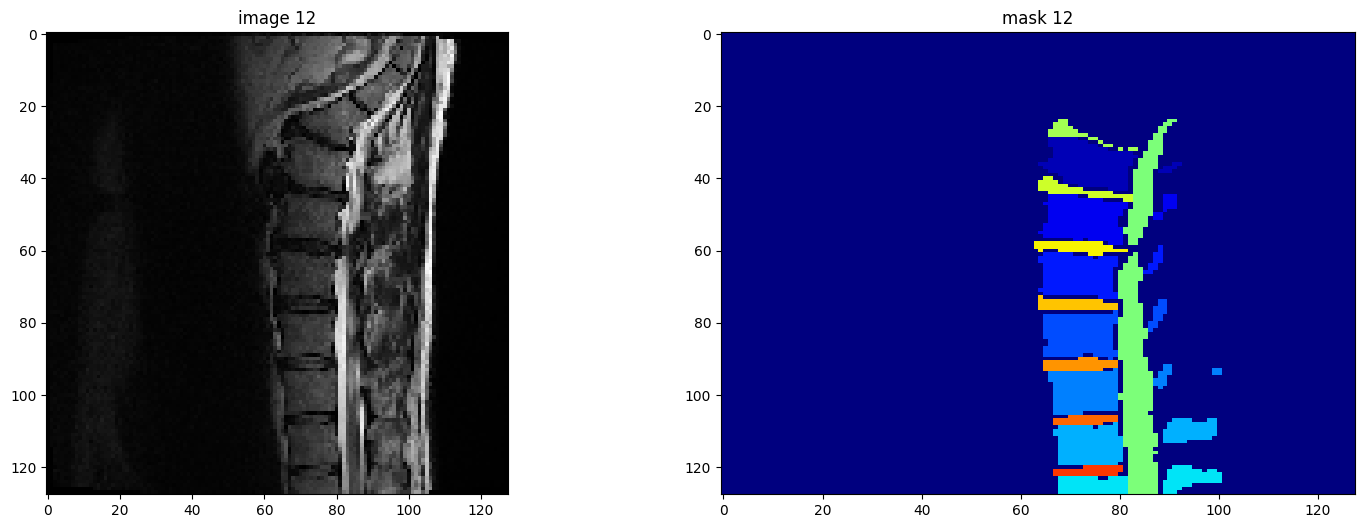

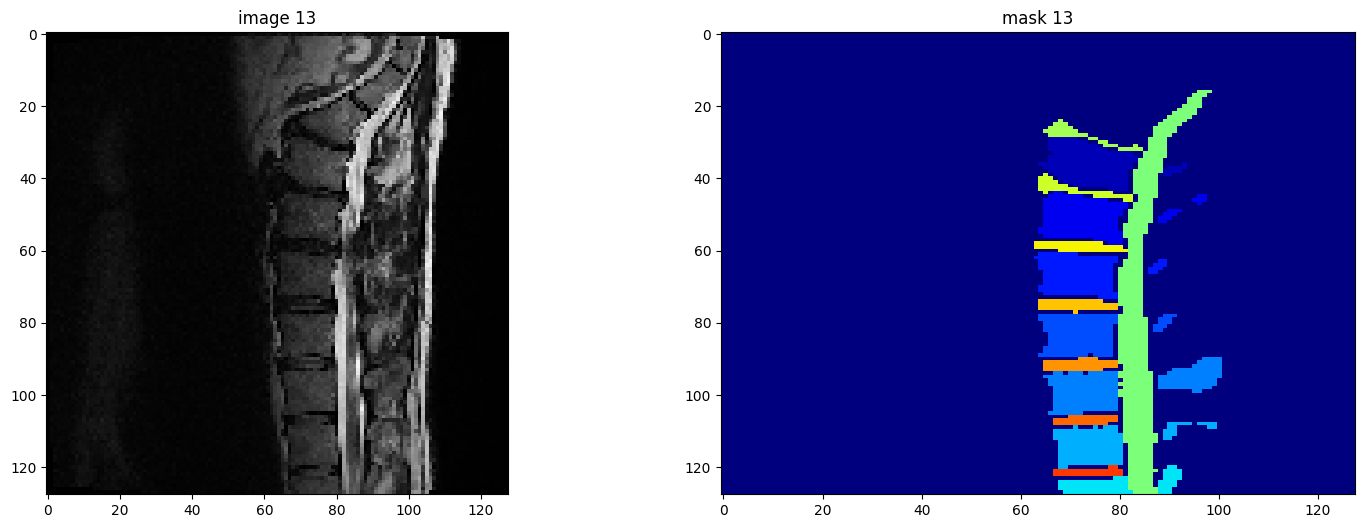

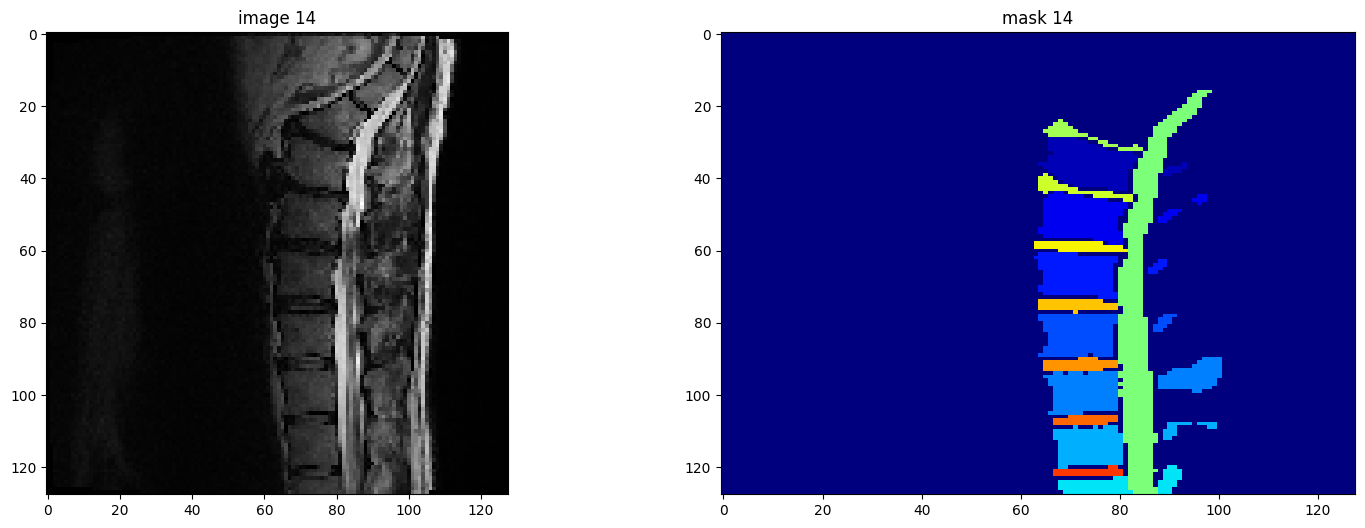

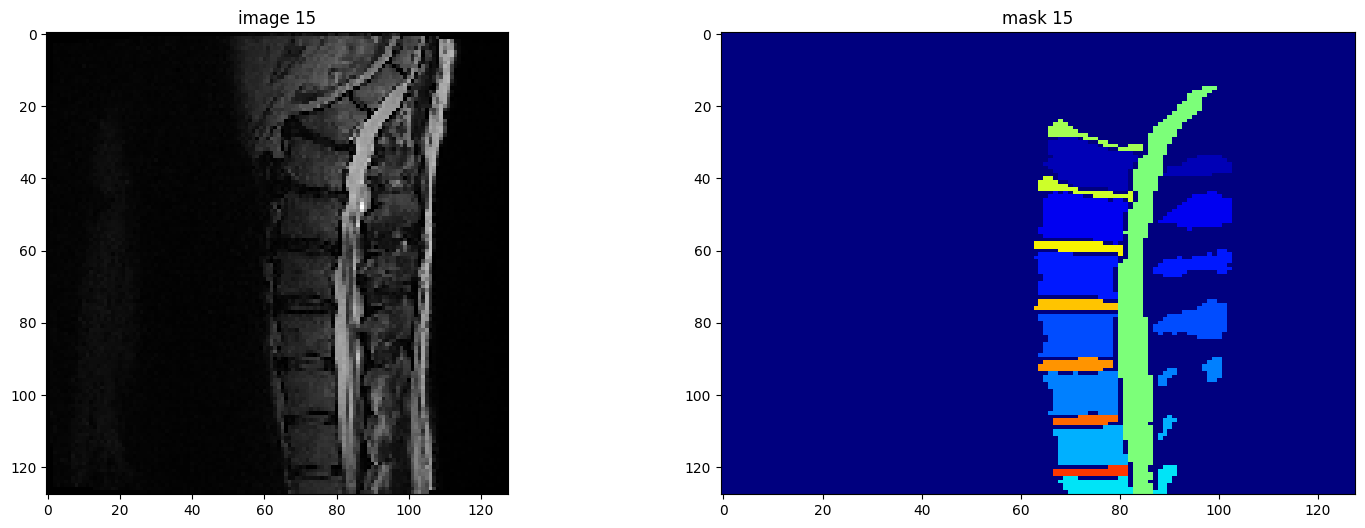

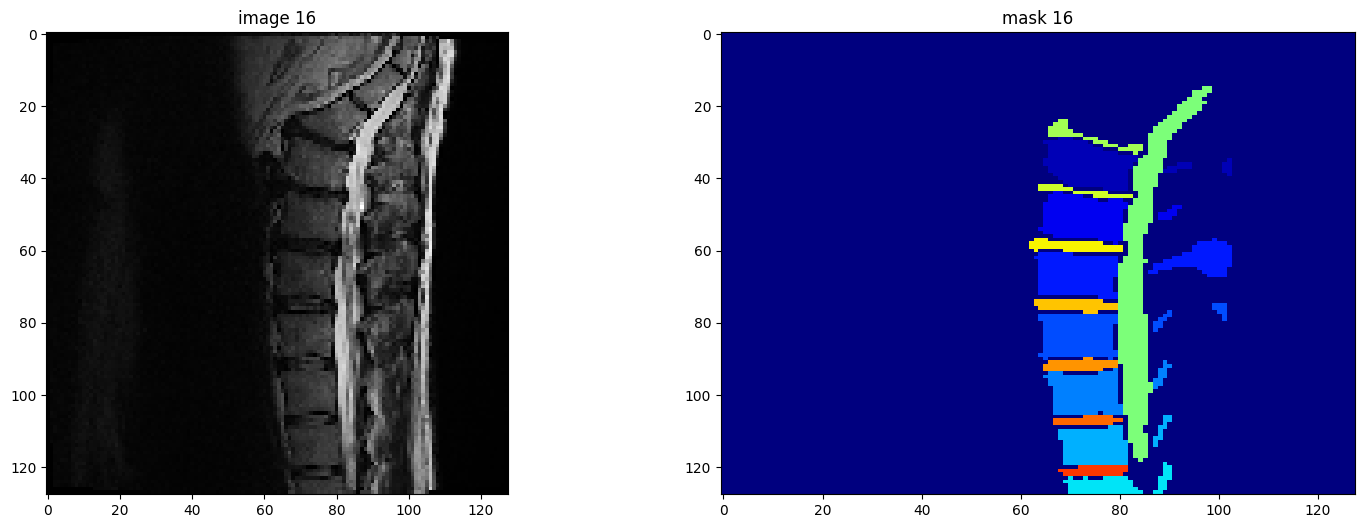

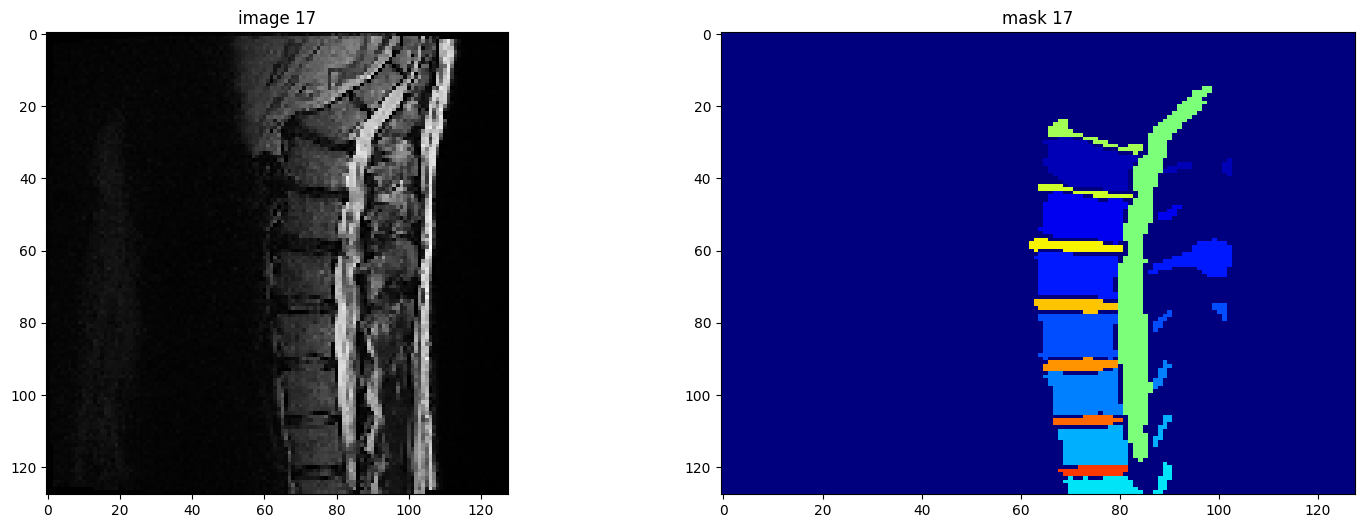

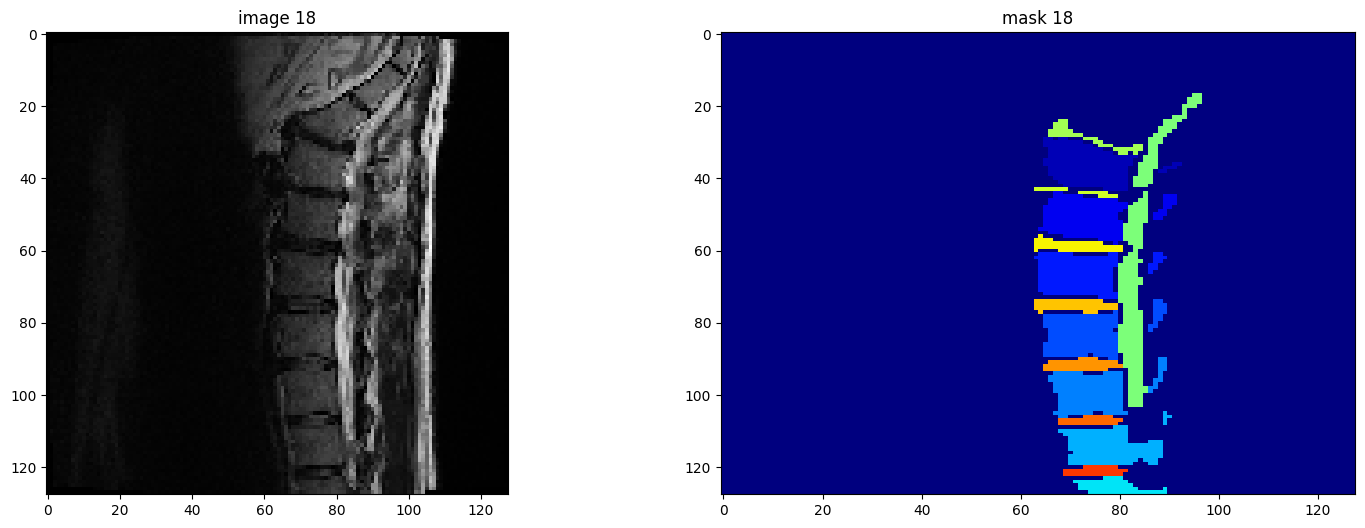

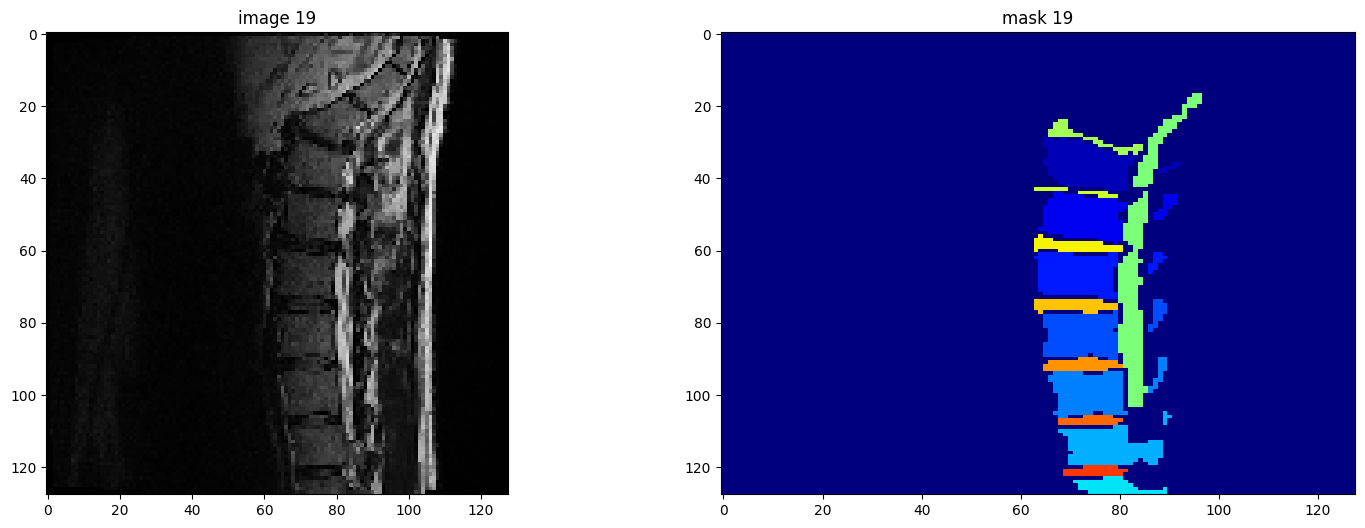

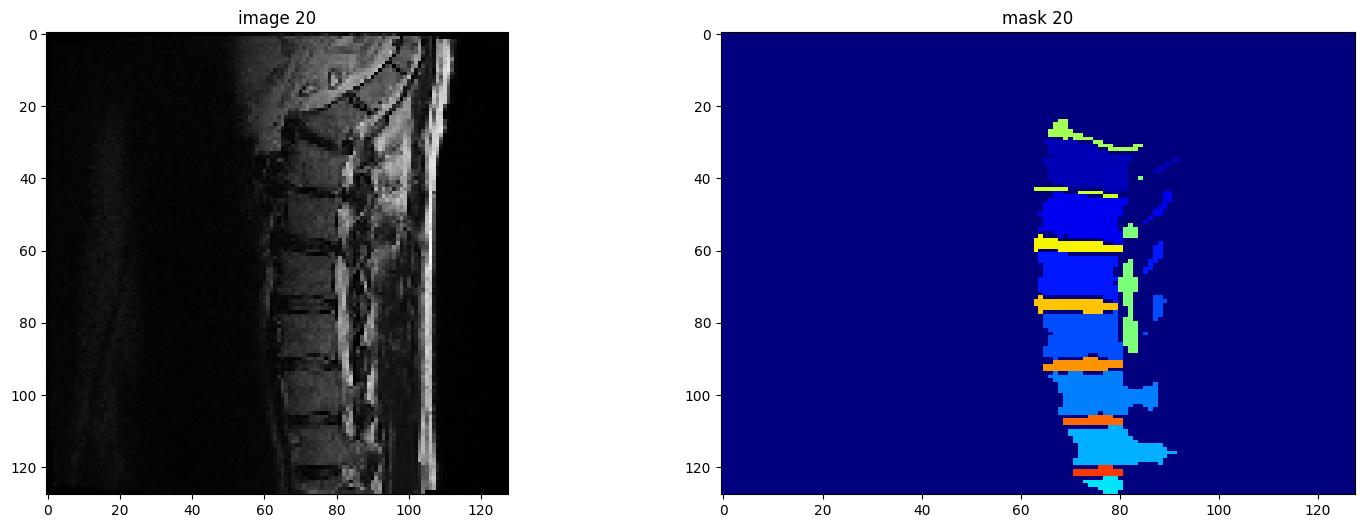

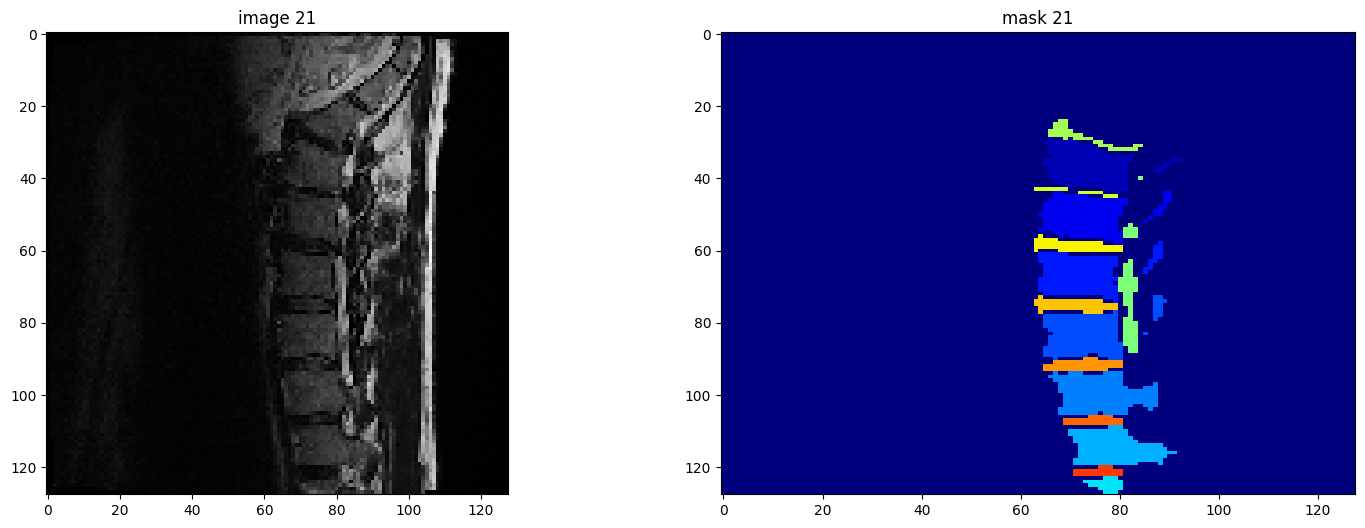

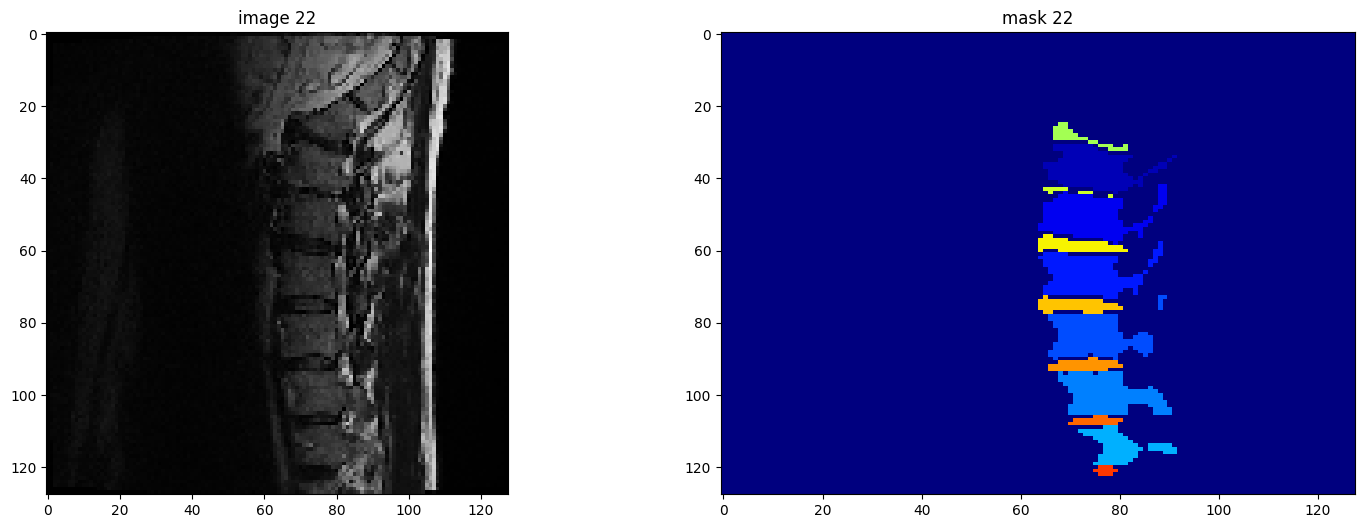

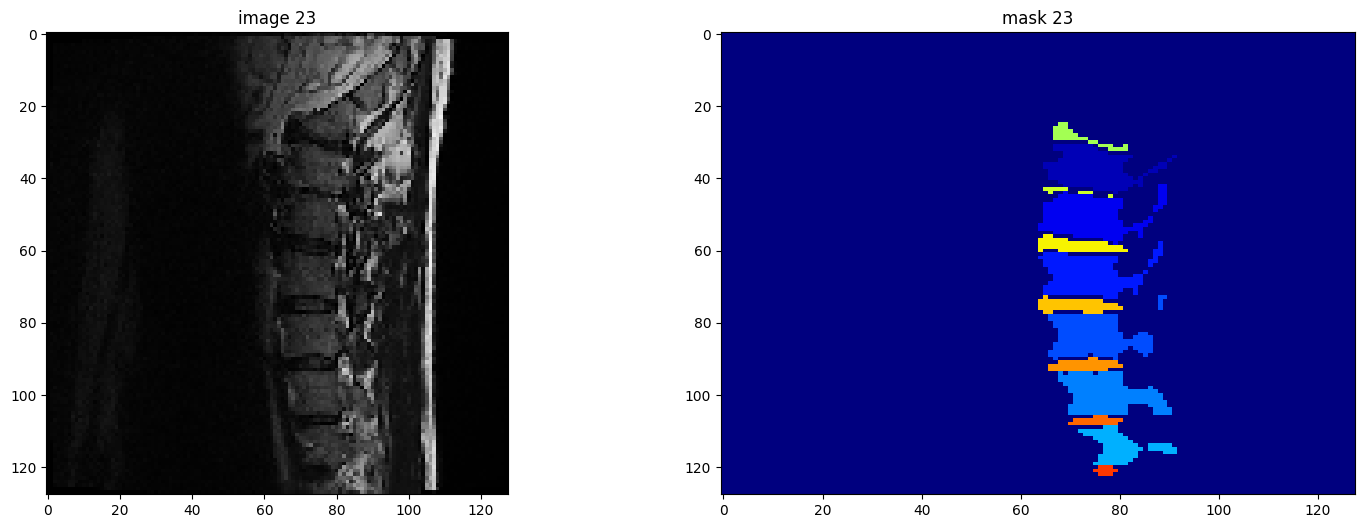

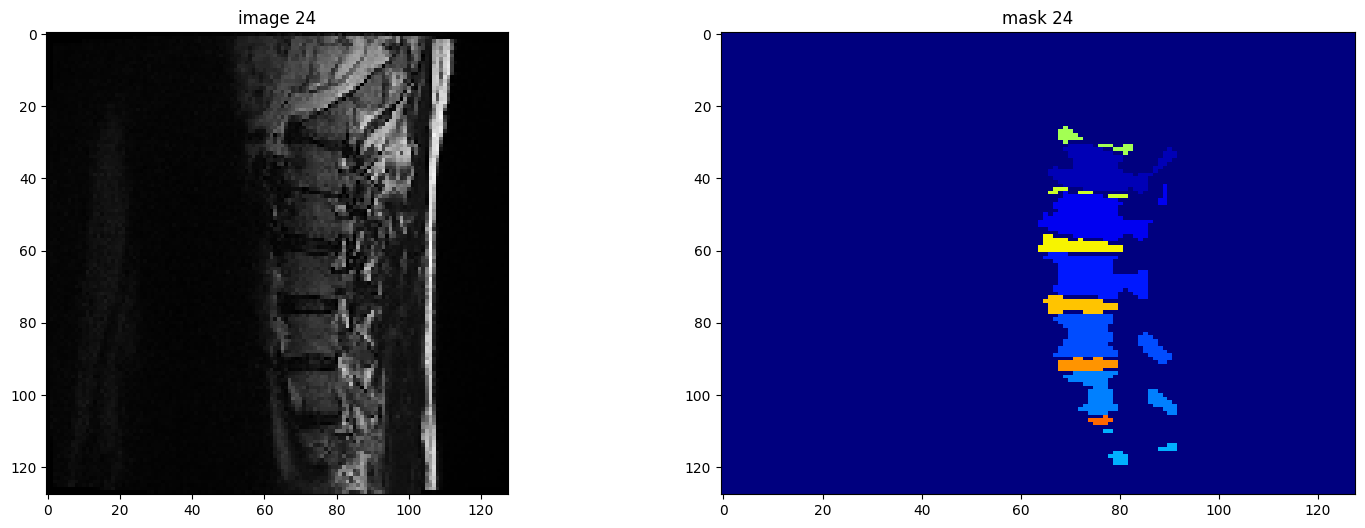

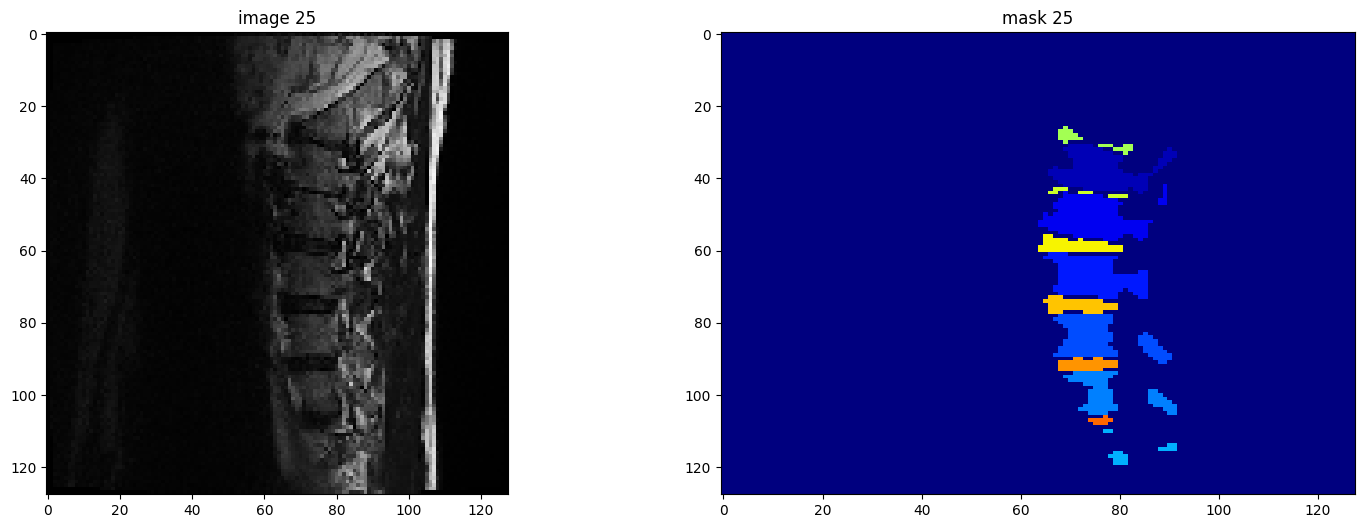

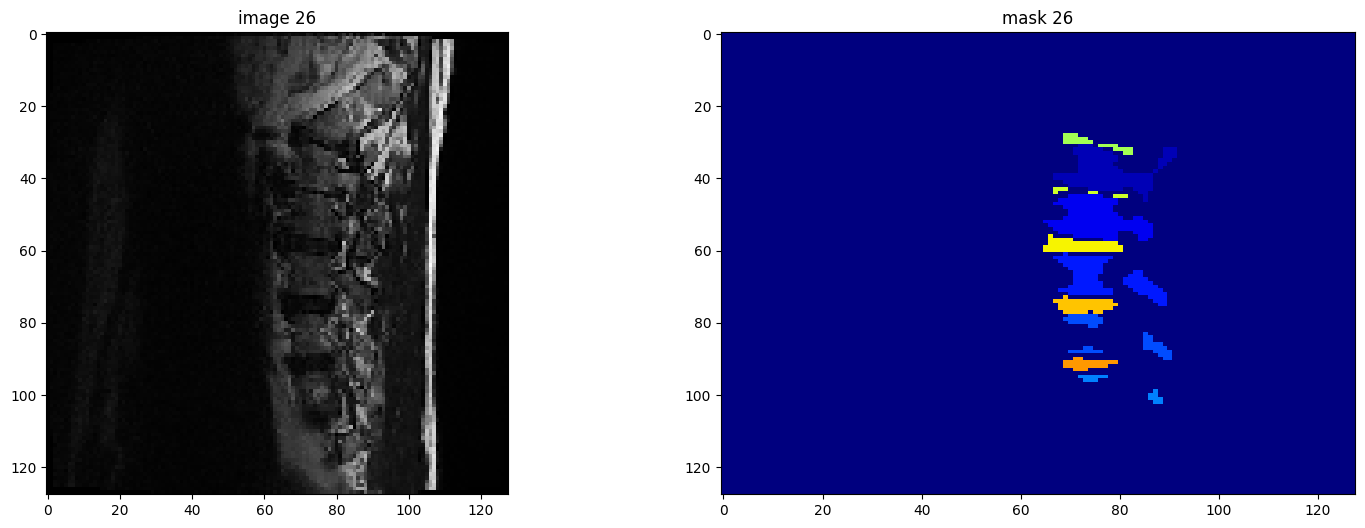

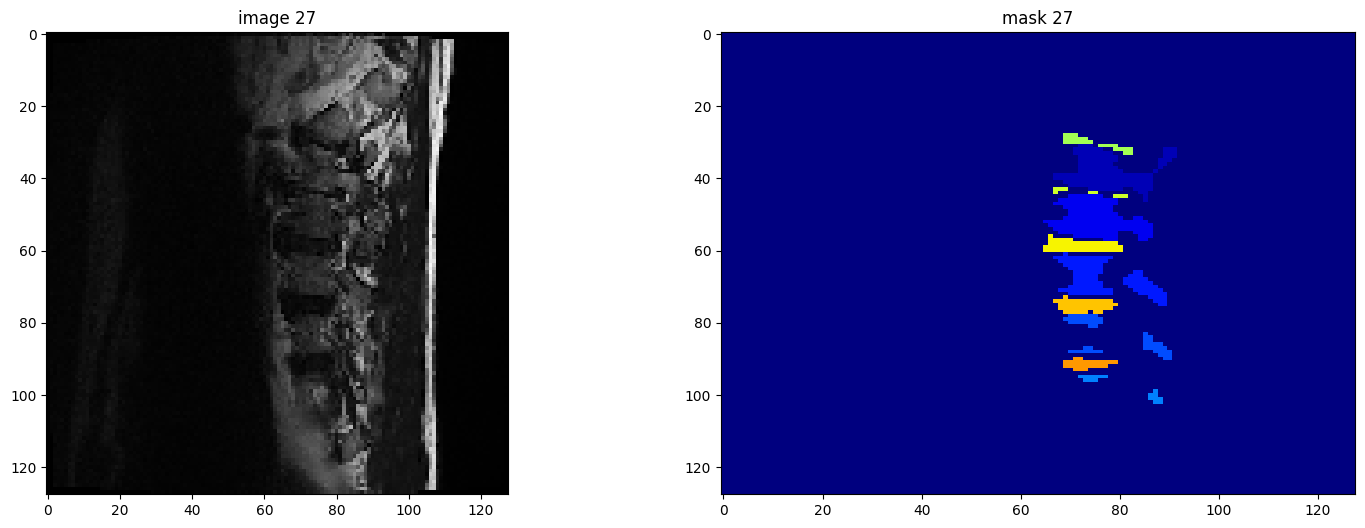

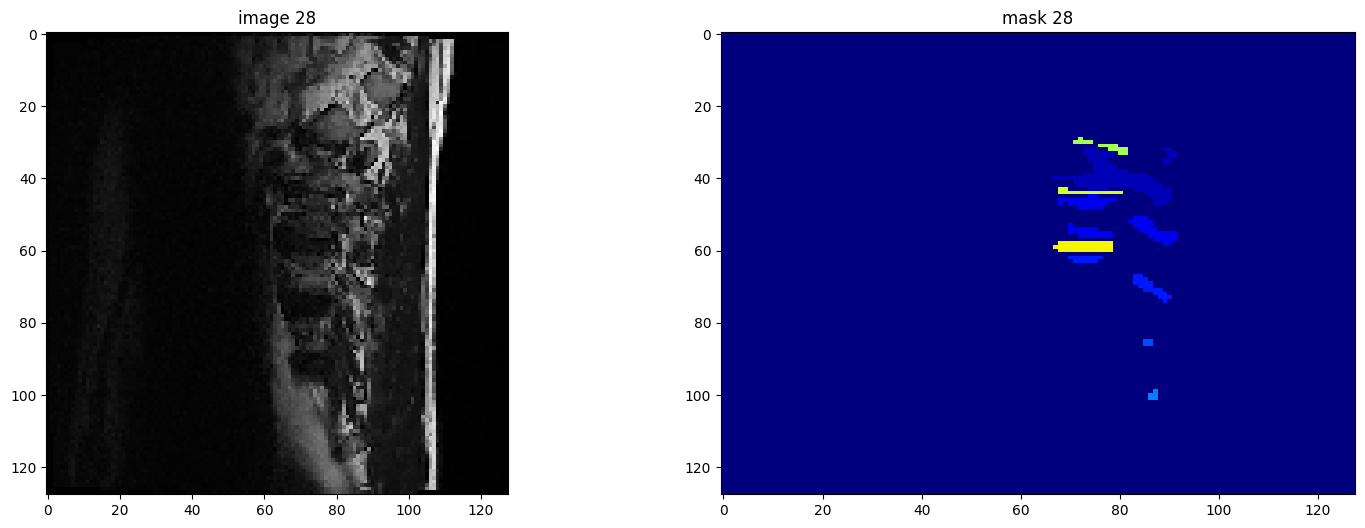

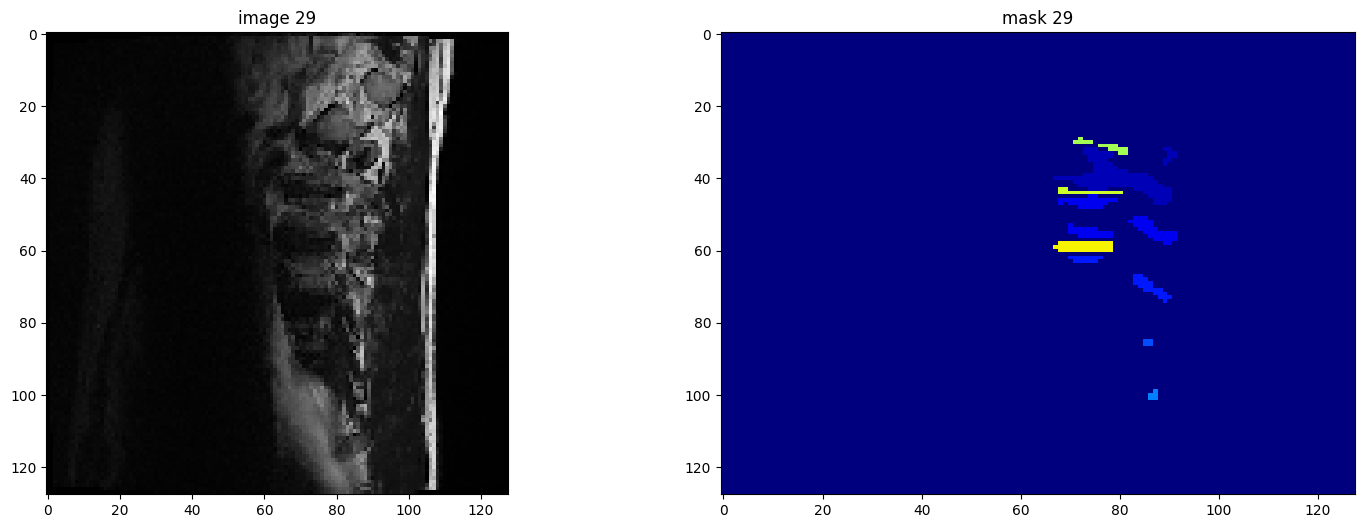

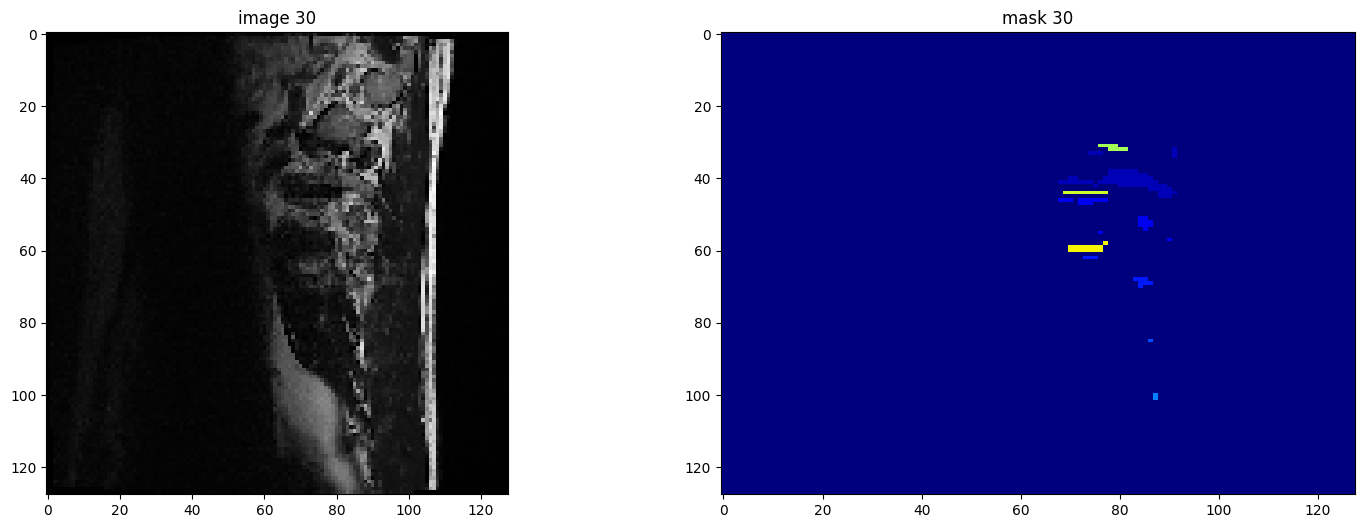

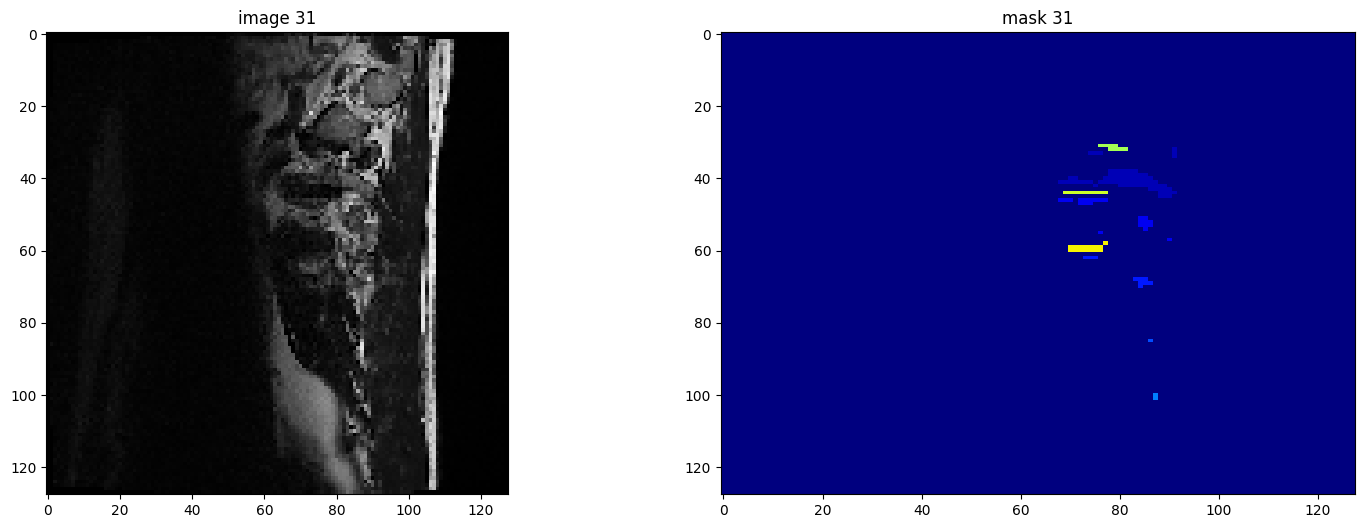

In [147]:
for i in range(image.GetWidth()):
    plt.figure("check", (18, 6))
    plt.subplot(1, 2, 1)
    plt.title(f"image {i}")
    plt.imshow(image_array[:, :,i], cmap="gray")
    plt.subplot(1, 2, 2)
    plt.title(f"mask {i}")
    plt.imshow(mask_array[:, :,i],vmin=0, vmax=20, cmap='jet', aspect='auto')
    plt.show()
    

- Internal axis are (X,Y,Z). It means, when we get numpy array dimensions are (Z,Y,X) i.e. shifted.
- When we define orientation, orientation string is according to internal axis. 
- The orientation string is set with the latest letter, e.g. : 
    - "RPS" = (left-to-Right, anterior-to-Posterior, inferior-to-Superior)
    - "PSR" = (anterior-to-Posterior, inferior-to-Superior, left-to-Right)

- Internal Pixel arrangement for SimpleItk
- (X, Y, Z) = (→, ↓, ↑)

In [148]:
print(f'type = {type(image_array)}')
print(f'shape = {image_array.shape}')

type = <class 'numpy.ndarray'>
shape = (128, 128, 32)


In [149]:
raw_img_sitk = sitk.DICOMOrient(image,'PSR')

raw_img_sitk_arr = sitk.GetArrayFromImage(raw_img_sitk)
print(raw_img_sitk_arr.shape)

(32, 128, 128)
